In [3]:
! pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 25.1 MB/s eta 0:00:00a 0:00:01


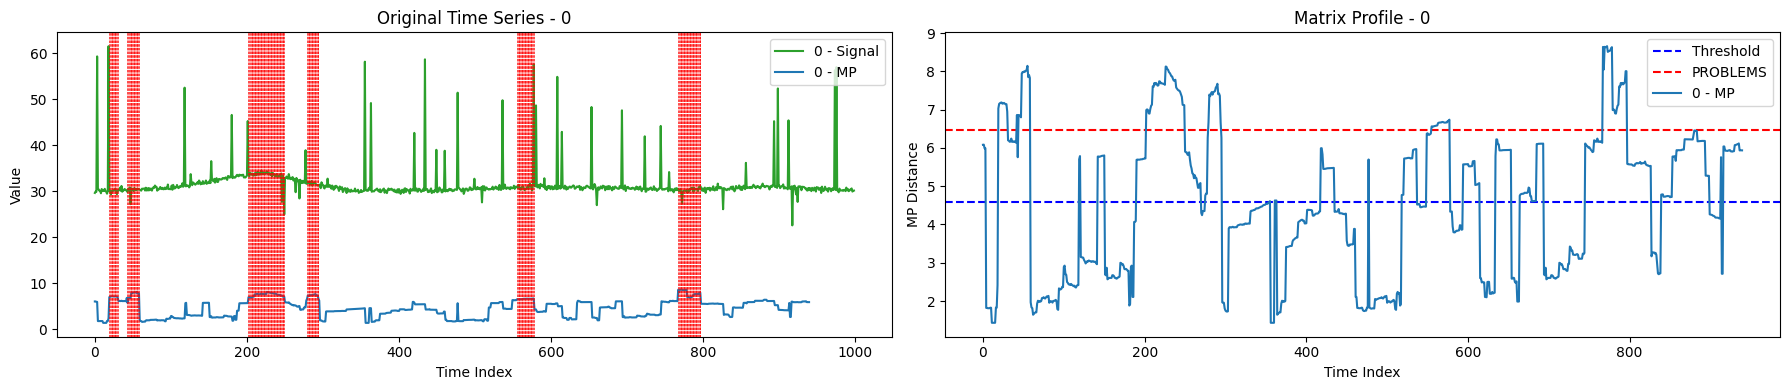

In [8]:
import numpy as np
import pandas as pd
import stumpy 
import matplotlib.pyplot as plt

df_np = np.load("../models/2.npy")
df = pd.DataFrame(df_np)

data = (df - df.mean()) / df.std()

ranks = {}
matrix_profile_dists = {}

# for col in data.columns:
#     init_window = data[:30]
#     stream_data = data[30:]
#     stream = stumpy.stumpi(init_window, m= 20, egress=False)

#     for point in stream_data:
#         stream.update(point)

#     mp = np.array(stream.P_)
#     matrix_profile_dists[col] = mp

#     rank = pd.Series(mp).quantile(0.995) - pd.Series(mp).quantile(0.8)
#     ranks[col] = rank

# for col, mp in matrix_profile_dists.items():
#     plt.figure(figsize=(12, 4))
#     plt.plot(mp, label=f'{col} - Matrix Profile')
#     plt.axhline(np.nanpercentile(mp, 99.5), linestyle='--', color='red', label='Threshold')
#     plt.title(f'Matrix Profile (Streaming) - {col}')
#     plt.xlabel("Time Index")
#     plt.ylabel("MP Distance")
#     plt.legend()
#     plt.show()
for col in data.columns:
    m = 60
    feature = data[col]
    matrix_profile = stumpy.stump(feature, m, ignore_trivial=True)
    matrix_profile_dist = matrix_profile[:,0]
    df_matrix_profile_dist = pd.Series(matrix_profile_dist)
    #threshold/rank change if needed to std and mean 
    rank = df_matrix_profile_dist.quantile(0.995) - df_matrix_profile_dist.quantile(0.8)
    ranks[col] = rank
    matrix_profile_dists[col] = matrix_profile_dist

num_features = len(matrix_profile_dists)
fig, axes = plt.subplots(num_features, 2, figsize=(18, 4 * num_features), sharex='col')

# Normalize axes to always be 2D
if num_features == 1:
    axes = np.array(axes).reshape(1, 2)

for i, (col, mp_dist) in enumerate(matrix_profile_dists.items()):
    original_signal = df[col].values

    axes[i, 0].plot(original_signal, color='tab:green', label=f"{col} - Signal")
    axes[i, 0].plot(mp_dist, color='tab:blue', label=f"{col} - MP")
    axes[i, 0].set_title(f"Original Time Series - {col}")
    axes[i, 0].set_ylabel("Value")
    axes[i, 0].legend()

    mask = np.where(matrix_profile_dists[0] > 1 * np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])))[0]


    for value in mask:
        axes[i, 0].axvline(x=value, color='red', linestyle='--', linewidth=0.5)


    axes[i, 1].axhline(y=np.mean(matrix_profile_dists[0]), color='blue', linestyle='--', label='Threshold')
    axes[i, 1].axhline(y=np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])), color='red', linestyle='--', label='PROBLEMS')


    axes[i, 1].plot(mp_dist, color='tab:blue', label=f"{col} - MP")
    axes[i, 1].set_title(f"Matrix Profile - {col}")
    axes[i, 1].set_ylabel("MP Distance")
    axes[i, 1].legend()

axes[-1, 0].set_xlabel("Time Index")
axes[-1, 1].set_xlabel("Time Index")
plt.tight_layout()
plt.show()

In [69]:
np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0]))

mparray(5.0466310392624205, dtype=object)

In [90]:
mask = np.where(matrix_profile_dists[0] > np.mean(matrix_profile_dists[0]) + np.std(np.array(matrix_profile_dists[0])))
# matrix_profile_dists[0][mask]

mask[0].shape

(169,)

In [52]:
df_np

array([30.61, 30.63, 30.48, 54.19, 30.12, 30.41, 30.51, 29.97, 30.93,
       30.83, 30.21, 30.84, 30.39, 30.56, 30.62, 30.42, 30.39, 30.64,
       54.1 , 30.45, 30.76, 30.46, 30.8 , 30.58, 30.28, 30.52, 30.33,
       30.35, 30.61, 30.75, 30.89, 30.32, 30.7 , 30.41, 30.54, 30.56,
       30.8 , 30.78, 30.53, 30.28, 30.14, 30.67, 30.19, 31.06, 30.74,
       30.54, 30.36, 44.1 , 30.51, 30.38, 30.89, 30.14, 30.47, 30.35,
       30.47, 30.58, 30.62, 30.74, 30.76, 30.4 , 30.45, 30.65, 30.2 ,
       30.31, 30.47, 30.67, 30.79, 30.24, 30.69, 30.46, 30.51, 29.98,
       30.33, 30.81, 30.67, 30.7 , 30.15, 30.49, 30.39, 30.15, 30.46,
       30.67, 30.28, 30.49, 30.42, 30.89, 30.88, 30.39, 30.33, 30.34,
       30.41, 30.34, 30.1 , 30.61, 31.38, 30.22, 30.51, 30.11, 30.58,
       30.99, 32.99, 30.76, 30.41, 30.52, 30.69, 30.33, 30.33, 30.27,
       30.13, 30.69, 30.36, 30.21, 30.92, 30.7 , 30.3 , 30.74, 30.6 ,
       30.49, 20.45, 30.31, 30.87, 30.96, 30.75, 31.18, 30.82, 30.81,
       37.85, 31.12,

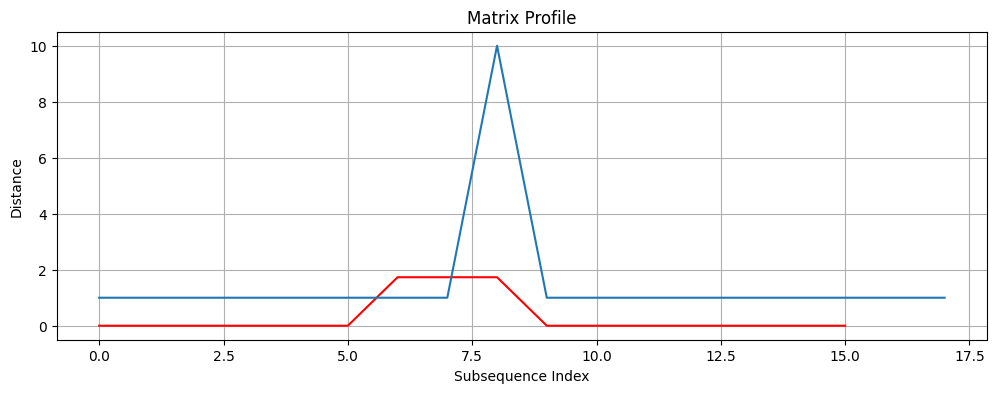

In [ ]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
ts = np.array([1, 1, 1, 1, 1, 1, 1 ,1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1]).astype(np.float64)

# Subsequence window size
m = 3

# Compute matrix profile
mp = stumpy.stump(ts, m)

# Matrix profile values
matrix_profile = mp[:, 0]  # First column is the matrix profile

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(matrix_profile, color = "red")
plt.plot(ts)
plt.title("Matrix Profile")
plt.xlabel("Subsequence Index")
plt.ylabel("Distance")
plt.grid()
plt.show()


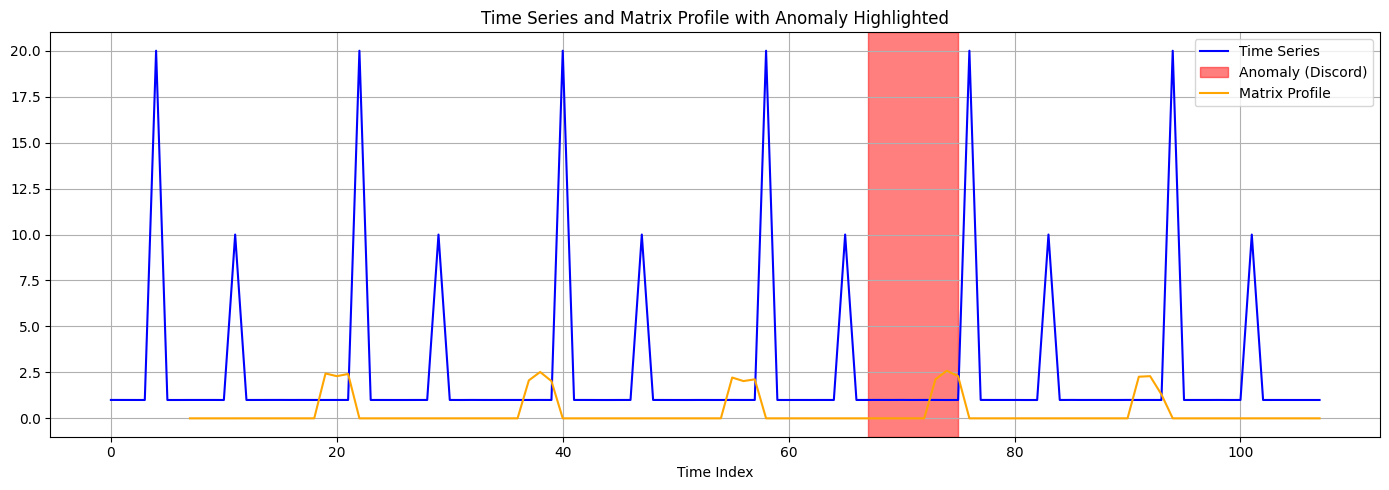

In [48]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Example time series data with an anomaly at index 8
ts = np.array([1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1 ,1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1]).astype(np.float64)


ts = ts + np.random.normal(0, 0.001, size=ts.shape)
# Subsequence window size
m = 8

# Compute matrix profile
mp = stumpy.stump(ts, m)
matrix_profile = mp[:, 0]

# Find the discord (anomaly = max value in matrix profile)
discord_idx = np.argmax(matrix_profile)

# Plotting
plt.figure(figsize=(14, 5))

# Plot original time series
plt.plot(ts, label="Time Series", color="blue")

# Highlight the discord region
plt.axvspan(discord_idx, discord_idx + m, color='red', alpha=0.5, label='Anomaly (Discord)')

# Plot matrix profile below
plt.plot(range(m - 1, len(ts)), matrix_profile, color='orange', label='Matrix Profile')

plt.title("Time Series and Matrix Profile with Anomaly Highlighted")
plt.xlabel("Time Index")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [35]:
matrix_profile

mparray([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0], dtype=object)

In [45]:
mp[:, 0]

mparray([0.00044649794743491, 0.0005351547959562359,
         0.0004478311722563004, 0.00030263664460118255,
         0.0002799849280051941, 0.0006537901888182941,
         0.0006527328281482381, 0.0006514367619441752,
         0.0007421587471188887, 0.0012883995881161105,
         0.0012443908350174109, 0.001346602983903266, 2.462139798545031,
         0.0006286433902048329, 0.0006228021760745897,
         0.00063029561262457, 0.0006716712730747361, 0.000663121675540578,
         0.0006604702511795167, 0.0007263994133368482,
         0.000667595726549175, 0.0007023542124148156,
         0.0007063375130053121, 0.0012163022607689458,
         0.0015230151843873847, 0.0012299579871571087,
         0.0012603262577337879, 0.0014964747740519651,
         0.0013373465612071898, 0.001366230260330911, 3.1872040195244584,
         0.0006365034832588218, 0.0006395855188656726,
         0.00063029561262457, 0.0006043858002984434,
         0.0006584264204703197, 0.00044649794743491,
         0.000

In [64]:
matrix_profile[:, 0]

mparray([5.579304826015901, 5.580886786976461, 5.5809435235439535,
         5.582741521230796, 3.734713623587227, 3.736135335151667,
         3.7358387753120685, 3.736003680593719, 3.74086097620379,
         3.6897207314632947, 3.690707592898349, 3.0005144715447774,
         3.00592789350696, 2.984997870055549, 2.972476291452824,
         2.96350981952969, 2.932350506250909, 2.9228547712260173,
         2.9079556221385774, 1.4301201126877043, 1.4293853187489949,
         0.9216517251350443, 0.9109051805307575, 0.8914930375681382,
         0.9015621180143782, 0.905313040663364, 0.9151179370050679,
         0.9021885177744382, 0.8999826802621201, 0.8956744035124921,
         0.8960959045733116, 0.8763068437415372, 0.8681599143739251,
         0.8723114252576819, 0.8747015599591164, 0.8714191295337748,
         0.949604073541941, 1.001730541036946, 1.0040090658024587,
         1.0246813520531546, 0.976129828161725, 0.9471230772264052,
         0.9332666381107448, 0.9944807895624231, 0.924

In [138]:
time_series

array([29.63, 29.08, 29.32, 29.69, 29.8 , 29.76, 29.52, 29.63, 46.69,
       29.96, 29.13, 33.18, 33.1 , 33.09, 33.46, 33.06, 32.53, 32.42,
       32.55, 16.57, 33.4 , 32.96, 32.97, 33.39, 32.36, 35.59, 36.17,
       32.8 , 30.17, 20.32, 29.52, 30.2 , 29.45, 29.93, 29.7 , 30.16,
       30.31, 29.71, 30.18, 18.48, 29.32, 30.18, 30.36, 30.31, 30.48,
       29.8 , 30.18, 29.37, 30.26, 29.81, 30.55, 61.18, 30.06, 29.61,
       29.53, 29.51, 29.84, 29.77, 29.5 , 29.29, 29.6 , 65.03, 30.5 ,
       29.93, 29.66, 29.53, 29.48, 29.47, 29.38, 30.43, 29.93, 29.38,
       29.33, 46.85, 29.63, 29.99, 29.91, 29.5 , 30.58, 30.  , 29.43,
       30.5 , 30.07, 29.83, 30.31, 25.89, 29.74, 30.54, 29.88, 29.87,
       29.83, 29.61, 30.27, 29.55, 30.07, 51.51, 29.46, 29.89, 30.27])

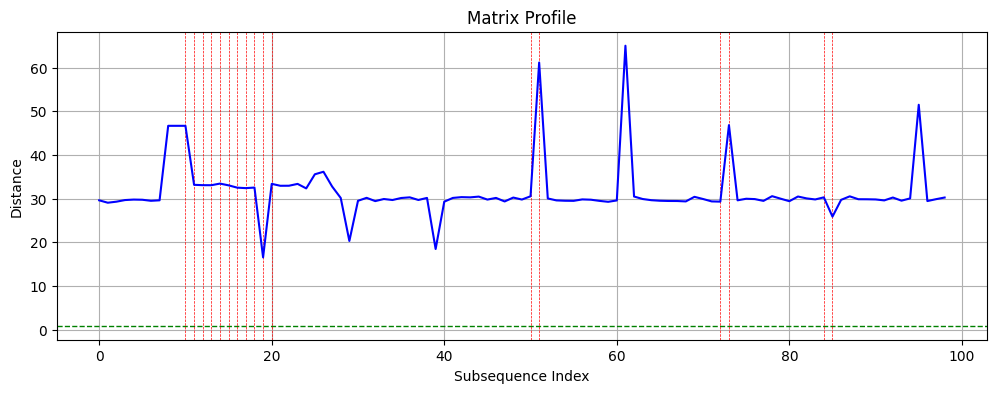

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

time_series = np.load("../models/3.npy")
window_size = 10
matrix_profile = stumpy.stump(time_series, m=window_size)

# time_series = (time_series - np.mean(time_series)) / np.std(time_series)

mp = np.array(matrix_profile[:, 0])

mask = np.where(mp > 1 * np.mean(mp) + np.std(mp))[0]

plt.figure(figsize=(12, 4))
# plt.plot(mp, color = "red")
plt.axhline(y=np.mean(mp), color='green', linestyle='--', linewidth=1)

for value in mask:
    plt.axvline(x=value + window_size, color='red', linestyle='--', linewidth=0.5)
plt.plot(time_series, color = "blue")
plt.title("Matrix Profile")
plt.xlabel("Subsequence Index")
plt.ylabel("Distance")
plt.grid()
plt.show()


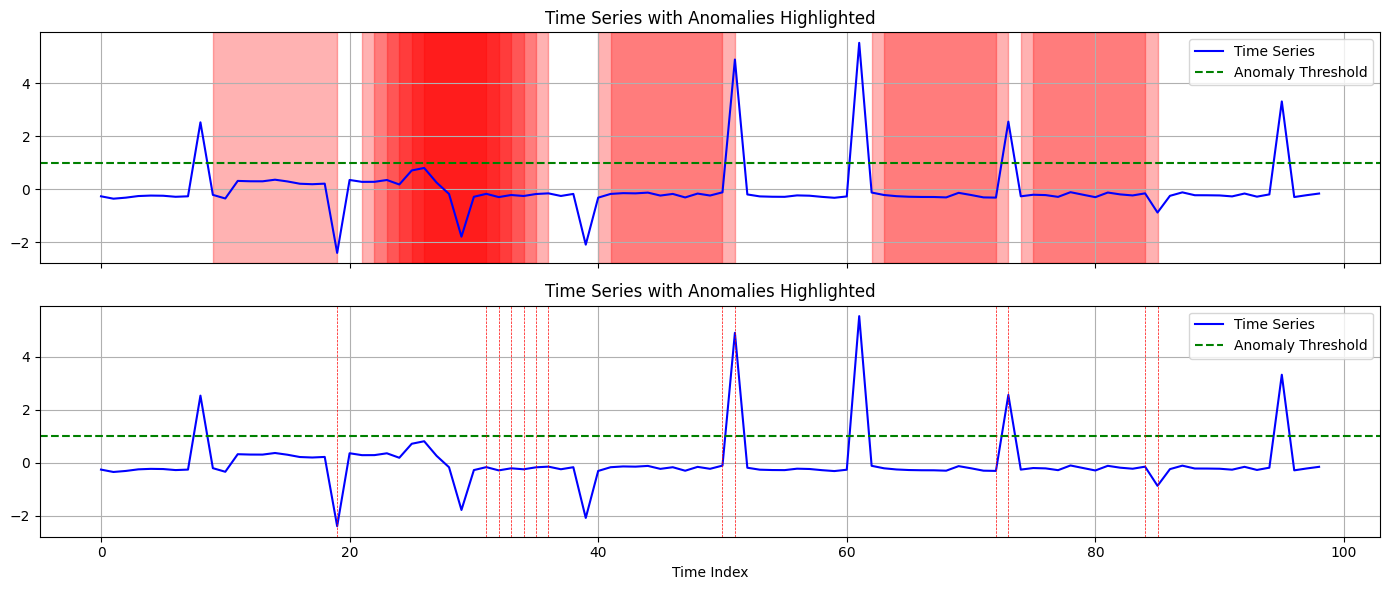

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

# Load and normalize time series
time_series = np.load("../models/3.npy")
time_series = (time_series - np.mean(time_series)) / np.std(time_series)

# Matrix Profile computation
window_size = 10
matrix_profile = stumpy.stump(time_series, m=window_size)
mp = np.array(matrix_profile[:, 0])

# Find anomalies (discords)
threshold = np.mean(mp) + np.std(mp)
anomaly_indices = np.where(mp > threshold)[0]

# Plot both time series and matrix profile
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# # --- Top plot: Time series with anomalies highlighted
axs[0].plot(time_series, color="blue", label="Time Series")

mean = np.mean(time_series) + np.std(time_series)

axs[0].axhline(y=mean, color='green', linestyle='--', label="Anomaly Threshold")

for idx in anomaly_indices:
    axs[0].axvspan(idx, idx + window_size, color='red', alpha=0.3)
axs[0].set_title("Time Series with Anomalies Highlighted")
axs[0].legend()
axs[0].grid()



axs[1].plot(time_series, color="blue", label="Time Series")

mean = np.mean(time_series) + np.std(time_series)

axs[1].axhline(y=mean, color='green', linestyle='--', label="Anomaly Threshold")

# for idx in anomaly_indices:
#     axs[1].axvspan(idx, idx + 1, color='red', alpha=0.3)
axs[1].set_title("Time Series with Anomalies Highlighted")
axs[1].legend()
axs[1].grid()

# # --- Bottom plot: Matrix profile with threshold and anomaly lines
# # axs[1].plot(range(window_size - 1, len(time_series)), mp, color="orange", label="Matrix Profile")
# axs[1].plot(range(window_size - 1, len(time_series)), mp, color="orange", label="Matrix Profile")
# axs[1].axhline(y=threshold, color='green', linestyle='--', label="Anomaly Threshold")

# # anomaly_indices = np.where(anomaly_indices < 100)[0]

for idx in anomaly_indices:
    axs[1].axvline(x=idx + window_size, color='red', linestyle='--', linewidth=0.5)

# axs[1].set_title("Matrix Profile")
# axs[1].legend()
# axs[1].grid()

plt.xlabel("Time Index")
plt.tight_layout()
plt.show()


In [77]:
mask = np.where(mp > 1 * np.mean(mp) + np.std(mp))

In [96]:
anomaly_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])